# Credit Card Approval Predictor  
Banks receive a lot of applications for issuance of credit cards. Many of them rejected for many reasons, like high-loan balances, low-income levels, or too many inquiries on an individual’s credit report. Manually analyzing these applications is error-prone and a time-consuming process. This task can be automated with the power of machine learning, In this project, we will be build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.
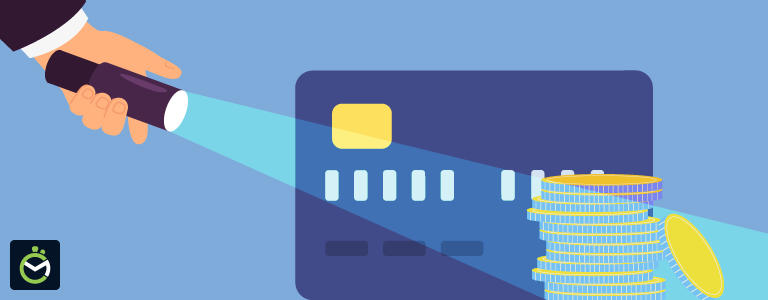

1. ID: Unique Id of the row  
2. CODE_GENDER: Gender of the applicant. M is male and F is female.  
3. FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.  
4. FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.  
5. CNT_CHILDREN: Count of children.  
6. AMT_INCOME_TOTAL: the amount of the income.  
7. NAME_INCOME_TYPE: The type of income (5 types in total).  
8. NAME_EDUCATION_TYPE: The type of education (5 types in total).  
9. NAME_FAMILY_STATUS: The type of family status (6 types in total).  
10. DAYS_BIRTH: The number of the days from birth (Negative values).  
11. DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.  
12. FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.  
13. FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.  
14. FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.    
15. FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.  
16. OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.  
17. CNT_FAM_MEMBERS: The count of family members.  


This is a csv file with credit record for a part of ID in application record. We can treat it a file to generate labels for modeling. For the applicants who have a record more than 59 past due, they should be rejected.

After reading the data, we have the following columns.

1. ID: Unique Id of the row in application record.
2. MONTHS_BALANCE: The number of months from record time.
3. STATUS: Credit status for this month.  
  X: No loan for the month  
  C: paid off that month   
  0: 1-29 days past due   
  1: 30-59 days past due   
  2: 60-89 days overdue  
  3: 90-119 days overdue   
  4: 120-149 days overdue   
  5: Overdue or bad debts, write-offs for more than 150 days   

In this project, we’ll be using Credit Card Approval Dataset. The structure of our project will be as follows:
1. To get a basic introduction of our project & What’s the business problem associated with it ?
2. We’ll start by loading and viewing the dataset.
3. To manipulate data, if there are any missing entries in the dataset.
4. To perform exploratory data analysis (EDA) on our dataset.
5. To pre-process data before applying machine learning model to the dataset.
6. To apply machine learning models that can predict if an individual’s application for a credit card will be accepted or not.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
# data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns

import missingno as msno
 #for visualizing missing data

from imblearn.over_sampling import SMOTE
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/Machine Learning/1 Supervised Learning/application_record.csv")
data

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
43855

In [ ]:
print("Number of datapoints for application records: {}".format(len(data)))
print("Number of unique clients in dataset: {}".format(len(data.ID.unique())))


Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


The number of application records & the unique ID's are not same which depicts the values must be duplicated.

In [ ]:
records = pd.read_csv(r"/content/drive/MyDrive/Machine Learning/1 Supervised Learning/credit_record.csv")
records

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

In [ ]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


Unique Clients & records are also not same which means that there is a duplicate values in the data.

#### **Before removing duplicated data**

In [ ]:
len(set(records['ID']).intersection(set(data['ID'])))

36457

The number of unique ids in the two datasets is not equal. There are fewer customers than applications in the credit record dataset. The intersection is 36,457 customers.

#### **After removing duplicated data**

In [ ]:
print(f'Duplicates in applications data: {data.iloc[:,1:].duplicated().sum()}, ({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')
print('')
print(f'Duplicates in records data: {records.duplicated().sum()}, ({np.round(100*records.duplicated().sum()/len(records),1)}%)')

Duplicates in applications data: 348472, (79.5%)

Duplicates in records data: 0, (0.0%)


#### **Drop duplicates**

In [ ]:
# Drop duplicates
data=data.drop_duplicates(subset=data.columns[1:], keep='first')

In [ ]:
data.shape

(90085, 18)

In [ ]:
len(set(records['ID']).intersection(set(data['ID'])))

9709

The number of unique ids in the two datasets is not equal. There are fewer customers than applications in the credit record dataset. The intersection is 9709 customers.

#### **Finding the Cardinality in the data**
Cardinality refers to the distinctiveness or uniqueness of values in a dataset or database column. It represents the number of unique values in a column or a set of columns.

In [ ]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
12           FLAG_MOBIL           1
1           CODE_GENDER           2
2          FLAG_OWN_CAR           2
3       FLAG_OWN_REALTY           2
15           FLAG_EMAIL           2
14           FLAG_PHONE           2
13      FLAG_WORK_PHONE           2
8    NAME_FAMILY_STATUS           5
6      NAME_INCOME_TYPE           5
7   NAME_EDUCATION_TYPE           5
9     NAME_HOUSING_TYPE           6
4          CNT_CHILDREN          12
17      CNT_FAM_MEMBERS          13
16      OCCUPATION_TYPE          18
5      AMT_INCOME_TOTAL         866
11        DAYS_EMPLOYED        9406
10           DAYS_BIRTH       16379
0                    ID       90085

In [ ]:
unique_counts = pd.DataFrame.from_records([(col, records[col].nunique()) for col in records.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
2          STATUS           8
1  MONTHS_BALANCE          61
0              ID       45985

In [ ]:
data["FLAG_MOBIL"].unique()

array([1])

From the above observations it was observed that "FLAG_MOBIL" is having only one value in the entire column which indicates that there is a singularity in the data in that particular column. So this values are going to be the same no matter whichever customer is taken into consideration. We can try to eliminate this variable as the values are not changing so contibution of this variable is quite negligible.

In [ ]:
data.drop(["FLAG_MOBIL"],axis=1,inplace=True)

In [ ]:
data.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0   5008804           M            Y               Y             0   
2   5008806           M            Y               Y             0   
3   5008808           F            N               Y             0   
7   5008812           F            N               Y             0   
10  5008815           M            Y               Y             0   

    AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           427500.0               Working               Higher education   
2           112500.0               Working  Secondary / secondary special   
3           270000.0  Commercial associate  Secondary / secondary special   
7           283500.0             Pensioner               Higher education   
10          270000.0               Working               Higher education   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         Civil marriage   Rented apartment      -12005          -4542   
2                Married  House / apartment      -21474          -1134   
3   Single / not married  House / apartment      -19110          -3051   
7              Separated  House / apartment      -22464         365243   
10               Married  House / apartment      -16872           -769   

    FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0                 1           0           0             NaN              2.0  
2                 0           0           0  Security staff              2.0  
3                 0           1           1     Sales staff              1.0  
7                 0           0           0             NaN              1.0  
10                1           1           1     Accountants              2.0

In [ ]:
data.shape

(90085, 17)

## **Handling Missing Values**
Missing values can pose challenges when working with data, as they can affect data integrity, accuracy, and validity of analysis or modeling results. It is important to handle missing values appropriately in order to avoid biased or incomplete analysis.

In [ ]:
data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

Text(0.5, 1.0, 'Missing Data for application records dataset')

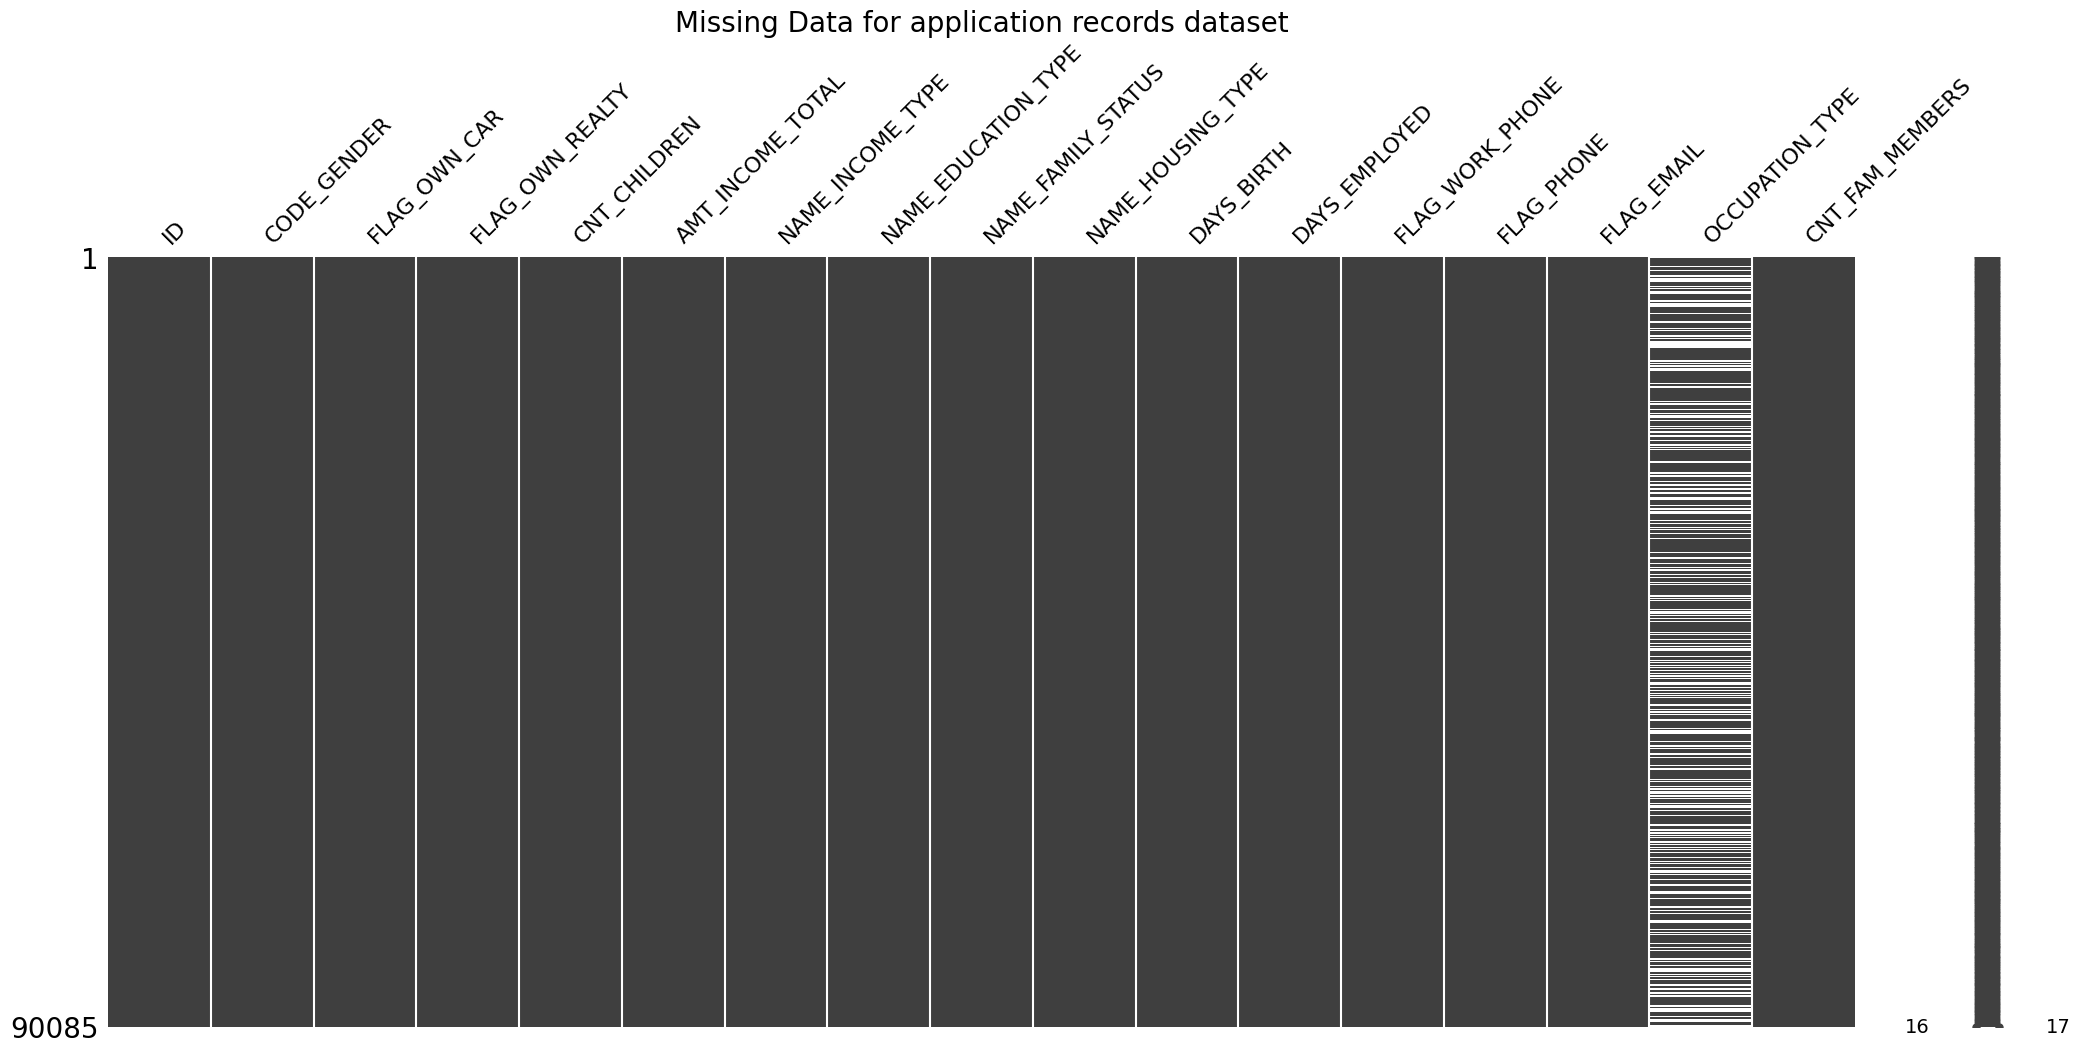

In [ ]:

missing = msno.matrix(data)
missing.set_title("Missing Data for application records dataset",fontsize=20)

As we can observe from above that "OCCUPATION_TYPE" is the only column from appplications data having large set of missing values.Appropriate handling of missing values can help ensure the integrity and accuracy of data analyses and modeling results.

In [ ]:
records.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Text(0.5, 1.0, 'Missing Data for credit records dataset')

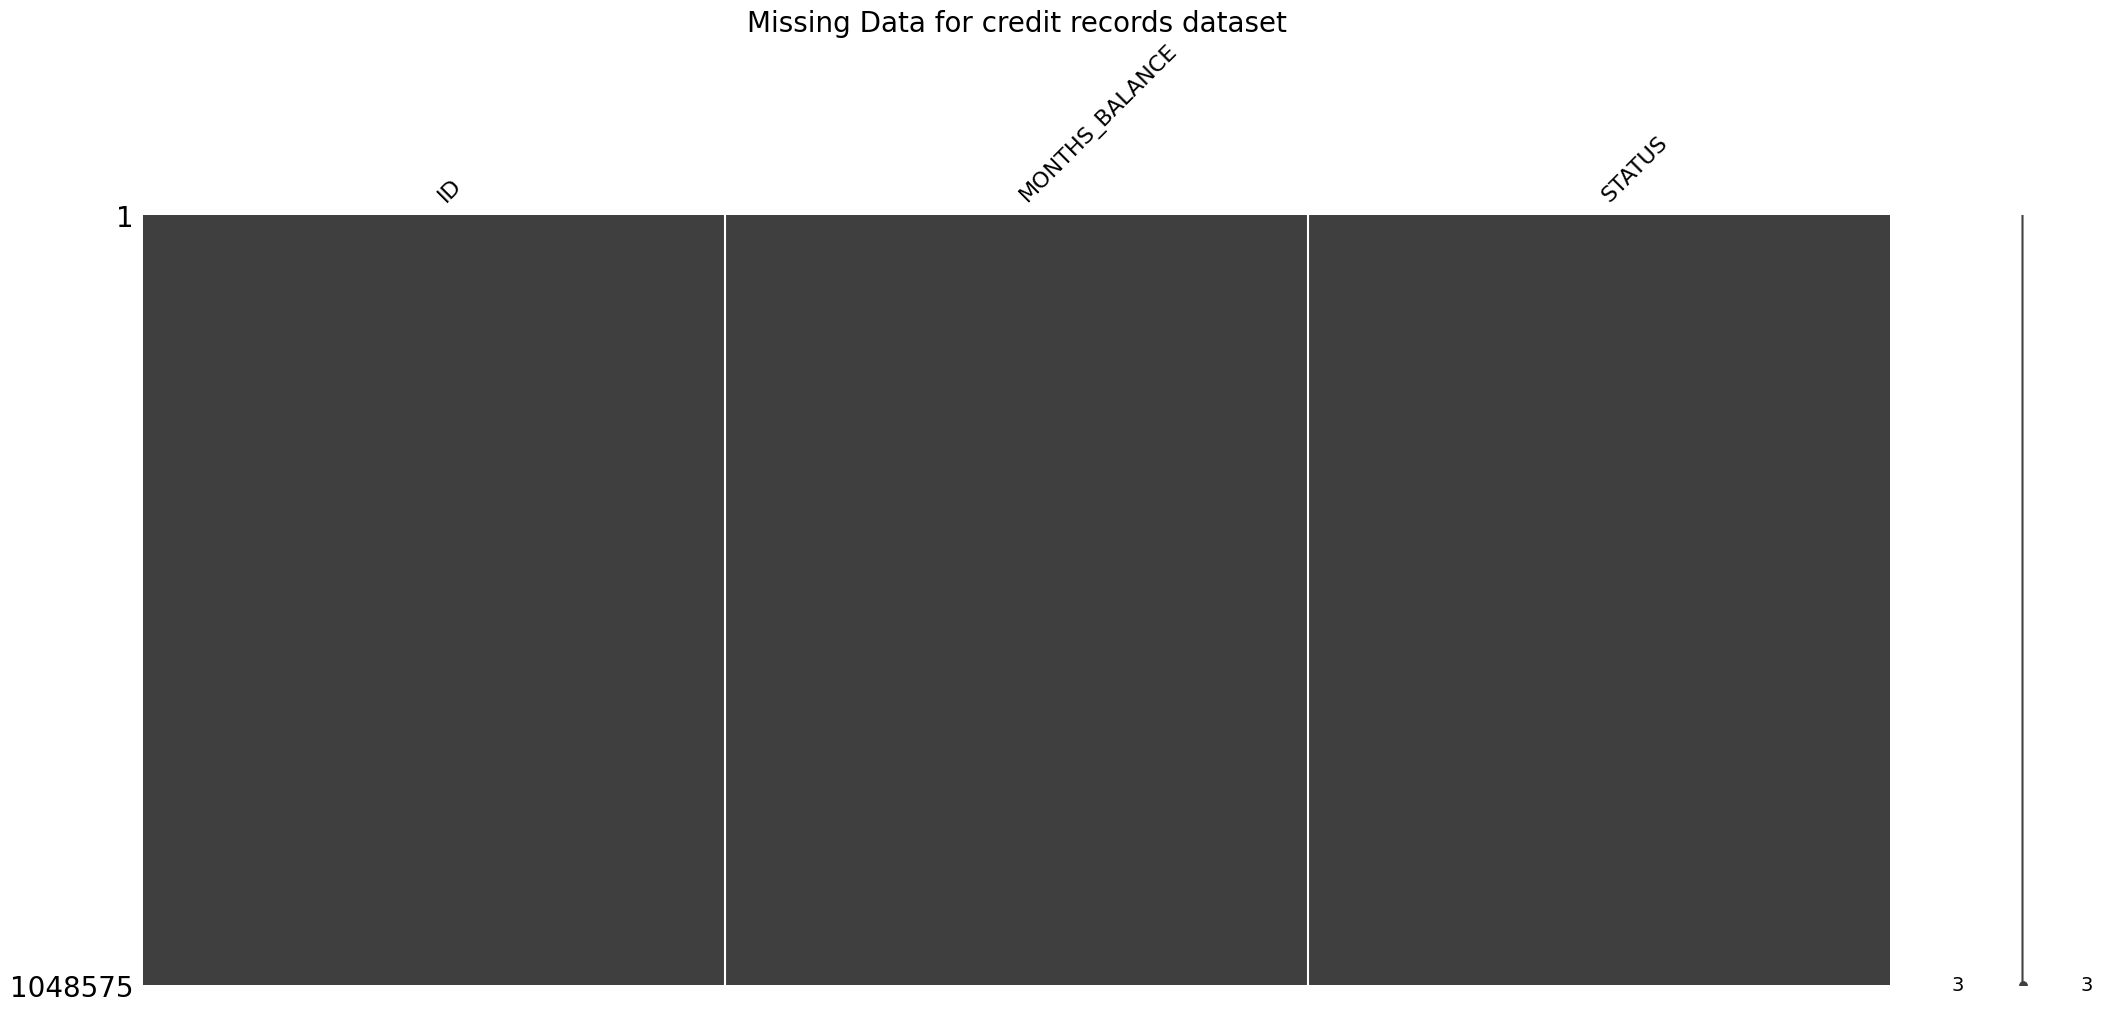

In [ ]:
missing2 = msno.matrix(records)

missing2.set_title("Missing Data for credit records dataset",fontsize=20)

In [ ]:
# Fill missing values
data['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

As droping the missing values completely can lead to huge data loss. So instead of dropping we will try to fill the missing values as "Other", so the data loss can also be prevented & missing values will also get handled appropriately.


In [ ]:
data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

#### **Converting data in proper format**

In [ ]:
records['target']=records['STATUS']
records['target'].replace('X', 0, inplace=True)
records['target'].replace('C', 0, inplace=True)
records['target']=records['target'].astype(int)
records.loc[records['target']>=1,'target']=1

In [ ]:
records

ID  MONTHS_BALANCE STATUS  target
0        5001711               0      X       0
1        5001711              -1      0       0
2        5001711              -2      0       0
3        5001711              -3      0       0
4        5001712               0      C       0
...          ...             ...    ...     ...
1048570  5150487             -25      C       0
1048571  5150487             -26      C       0
1048572  5150487             -27      C       0
1048573  5150487             -28      C       0
1048574  5150487             -29      C       0

[1048575 rows x 4 columns]

In [ ]:
# target=1 (high risk) if there is at least one month where user is late on payments by 30 days or more
df=pd.DataFrame(records.groupby(['ID'])['target'].agg(max)).reset_index()

In [ ]:
df.head()

ID  target
0  5001711       0
1  5001712       0
2  5001713       0
3  5001714       0
4  5001715       0

In [ ]:
new_df=pd.merge(data, df, how='inner', on=['ID'])

In [ ]:
new_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008806           M            Y               Y             0   
2  5008808           F            N               Y             0   
3  5008812           F            N               Y             0   
4  5008815           M            Y               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          112500.0               Working  Secondary / secondary special   
2          270000.0  Commercial associate  Secondary / secondary special   
3          283500.0             Pensioner               Higher education   
4          270000.0               Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1               Married  House / apartment      -21474          -1134   
2  Single / not married  House / apartment      -19110          -3051   
3             Separated  House / apartment      -22464         365243   
4               Married  House / apartment      -16872           -769   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                1           0           0           Other              2.0   
1                0           0           0  Security staff              2.0   
2                0           1           1     Sales staff              1.0   
3                0           0           0           Other              1.0   
4                1           1           1     Accountants              2.0   

   target  
0       1  
1       0  
2       0  
3       0  
4       0

In [ ]:
new_df.shape

(9709, 18)

In [ ]:
# Extract how many months account has been open for
start_df=pd.DataFrame(records.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

# Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

In [ ]:
start_df

ID  ACCOUNT_LENGTH
0      5001711               3
1      5001712              18
2      5001713              21
3      5001714              14
4      5001715              59
...        ...             ...
45980  5150482              28
45981  5150483              17
45982  5150484              12
45983  5150485               1
45984  5150487              29

[45985 rows x 2 columns]

In [ ]:
# Merge dataframes on ID
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])

In [ ]:
new_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0     5008804           M            Y               Y             0   
1     5008806           M            Y               Y             0   
2     5008808           F            N               Y             0   
3     5008812           F            N               Y             0   
4     5008815           M            Y               Y             0   
...       ...         ...          ...             ...           ...   
9704  5148694           F            N               N             0   
9705  5149055           F            N               Y             0   
9706  5149729           M            Y               Y             0   
9707  5149838           F            N               Y             0   
9708  5150337           M            N               Y             0   

      AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427500.0               Working               Higher education   
1             112500.0               Working  Secondary / secondary special   
2             270000.0  Commercial associate  Secondary / secondary special   
3             283500.0             Pensioner               Higher education   
4             270000.0               Working               Higher education   
...                ...                   ...                            ...   
9704          180000.0             Pensioner  Secondary / secondary special   
9705          112500.0  Commercial associate  Secondary / secondary special   
9706           90000.0               Working  Secondary / secondary special   
9707          157500.0             Pensioner               Higher education   
9708          112500.0               Working  Secondary / secondary special   

        NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0           Civil marriage     Rented apartment      -12005          -4542   
1                  Married    House / apartment      -21474          -1134   
2     Single / not married    House / apartment      -19110          -3051   
3                Separated    House / apartment      -22464         365243   
4                  Married    House / apartment      -16872           -769   
...                    ...                  ...         ...            ...   
9704        Civil marriage  Municipal apartment      -20600           -198   
9705               Married    House / apartment      -15837          -2694   
9706               Married    House / apartment      -19101          -1721   
9707               Married    House / apartment      -12387          -1325   
9708  Single / not married     Rented apartment       -9188          -1193   

      FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                   1           0           0           Other   
1                   0           0           0  Security staff   
2                   0           1           1     Sales staff   
3                   0           0           0           Other   
4                   1           1           1     Accountants   
...               ...         ...         ...             ...   
9704                0           0           0        Laborers   
9705                1           1           0           Other   
9706                0           0           0           Other   
9707                0           1           1  Medicine staff   
9708                0           0           0        Laborers   

      CNT_FAM_MEMBERS  target  ACCOUNT_LENGTH  
0                 2.0       1              15  
1                 2.0       0              29  
2                 1.0       0               4  
3                 1.0       0              20  
4                 2.0       0               5  
...               ...     ...             ...  
9704              2.0       1              20  
9705              2.0       1              19  
9706              2.0       1              21  

In [ ]:

data["DAYS_BIRTH"]

0        -12005
2        -21474
3        -19110
7        -22464
10       -16872
          ...  
438541   -13510
438545   -18832
438547   -10966
438552   -22717
438553   -15939
Name: DAYS_BIRTH, Length: 90085, dtype: int64

As you can see that "DAYS_BIRTH" column is giving the information about the age of individual,but here it's not in a proper format . So we will try to convert it into a proper form to make it more understandable.

In [ ]:
# Create age feature
new_df['AGE_YEARS']=round(-new_df['DAYS_BIRTH']/365.2425,0)

In [ ]:
new_df['AGE_YEARS']

0       33.0
1       59.0
2       52.0
3       62.0
4       46.0
        ... 
9704    56.0
9705    43.0
9706    52.0
9707    34.0
9708    25.0
Name: AGE_YEARS, Length: 9709, dtype: float64

As now we can converted the "DAYS_BIRTH" column into a proper format & named it as "AGE_YEARS". So now both are somewhat sharing same set of information in the data. So we will drop out the "DAYS_BIRTH" for betterment of the data.

In [ ]:
new_df.drop(["DAYS_BIRTH"],axis=1,inplace=True)

In [ ]:
new_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008806           M            Y               Y             0   
2  5008808           F            N               Y             0   
3  5008812           F            N               Y             0   
4  5008815           M            Y               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          112500.0               Working  Secondary / secondary special   
2          270000.0  Commercial associate  Secondary / secondary special   
3          283500.0             Pensioner               Higher education   
4          270000.0               Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_EMPLOYED  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment          -4542                1   
1               Married  House / apartment          -1134                0   
2  Single / not married  House / apartment          -3051                0   
3             Separated  House / apartment         365243                0   
4               Married  House / apartment           -769                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  target  \
0           0           0           Other              2.0       1   
1           0           0  Security staff              2.0       0   
2           1           1     Sales staff              1.0       0   
3           0           0           Other              1.0       0   
4           1           1     Accountants              2.0       0   

   ACCOUNT_LENGTH  AGE_YEARS  
0              15       33.0  
1              29       59.0  
2               4       52.0  
3              20       62.0  
4               5       46.0

In [ ]:
# Create unemployed indicator
new_df['UNEMPLOYED']=0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

In [ ]:
new_df["DAYS_EMPLOYED"]

0        -4542
1        -1134
2        -3051
3       365243
4         -769
         ...  
9704      -198
9705     -2694
9706     -1721
9707     -1325
9708     -1193
Name: DAYS_EMPLOYED, Length: 9709, dtype: int64

As we can observe the no. of the days the customer is working i.e. "DAYS_EMPLOYED" is not in proper format, So we will try to convert it in a proper format.

In [ ]:
# Create years employed feature
new_df['YEARS_EMPLOYED']=round(-new_df['DAYS_EMPLOYED']/365.2425)
new_df.loc[new_df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

In [ ]:
new_df['YEARS_EMPLOYED']

0       12.0
1        3.0
2        8.0
3        0.0
4        2.0
        ... 
9704     1.0
9705     7.0
9706     5.0
9707     4.0
9708     3.0
Name: YEARS_EMPLOYED, Length: 9709, dtype: float64

As now we can converted the "DAYS_EMPLOYED" column into a proper format & named it as "AGE_EMPLOYED". So now both are somewhat sharing same set of information in the data. So we will drop out the "DAYS_EMPLOYED" for betterment of the data.

In [ ]:
new_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [ ]:
new_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0     5008804           M            Y               Y             0   
1     5008806           M            Y               Y             0   
2     5008808           F            N               Y             0   
3     5008812           F            N               Y             0   
4     5008815           M            Y               Y             0   
...       ...         ...          ...             ...           ...   
9704  5148694           F            N               N             0   
9705  5149055           F            N               Y             0   
9706  5149729           M            Y               Y             0   
9707  5149838           F            N               Y             0   
9708  5150337           M            N               Y             0   

      AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427500.0               Working               Higher education   
1             112500.0               Working  Secondary / secondary special   
2             270000.0  Commercial associate  Secondary / secondary special   
3             283500.0             Pensioner               Higher education   
4             270000.0               Working               Higher education   
...                ...                   ...                            ...   
9704          180000.0             Pensioner  Secondary / secondary special   
9705          112500.0  Commercial associate  Secondary / secondary special   
9706           90000.0               Working  Secondary / secondary special   
9707          157500.0             Pensioner               Higher education   
9708          112500.0               Working  Secondary / secondary special   

        NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  FLAG_WORK_PHONE  FLAG_PHONE  \
0           Civil marriage     Rented apartment                1           0   
1                  Married    House / apartment                0           0   
2     Single / not married    House / apartment                0           1   
3                Separated    House / apartment                0           0   
4                  Married    House / apartment                1           1   
...                    ...                  ...              ...         ...   
9704        Civil marriage  Municipal apartment                0           0   
9705               Married    House / apartment                1           1   
9706               Married    House / apartment                0           0   
9707               Married    House / apartment                0           1   
9708  Single / not married     Rented apartment                0           0   

      FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  target  ACCOUNT_LENGTH  \
0              0           Other              2.0       1              15   
1              0  Security staff              2.0       0              29   
2              1     Sales staff              1.0       0               4   
3              0           Other              1.0       0              20   
4              1     Accountants              2.0       0               5   
...          ...             ...              ...     ...             ...   
9704           0        Laborers              2.0       1              20   
9705           0           Other              2.0       1              19   
9706           0           Other              2.0       1              21   
9707           1  Medicine staff              2.0       1              32   
9708           0        Laborers              1.0       1              13   

      AGE_YEARS  UNEMPLOYED  YEARS_EMPLOYED  
0          33.0           0            12.0  
1          59.0           0             3.0  
2          52.0           0             8.0  
3          62.0           1             0.0  
4          46.0           0             2.0  
...         ...         ...        

#### **Renaming the column names**

In [ ]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [ ]:
new_df.head()

ID Gender Own_car Own_property  Num_children  Total_income  \
0  5008804      M       Y            Y             0      427500.0   
1  5008806      M       Y            Y             0      112500.0   
2  5008808      F       N            Y             0      270000.0   
3  5008812      F       N            Y             0      283500.0   
4  5008815      M       Y            Y             0      270000.0   

            Income_type                 Education_type         Family_status  \
0               Working               Higher education        Civil marriage   
1               Working  Secondary / secondary special               Married   
2  Commercial associate  Secondary / secondary special  Single / not married   
3             Pensioner               Higher education             Separated   
4               Working               Higher education               Married   

        Housing_type  Work_phone  Phone  Email Occupation_type  Num_family  \
0   Rented apartment           1      0      0           Other         2.0   
1  House / apartment           0      0      0  Security staff         2.0   
2  House / apartment           0      1      1     Sales staff         1.0   
3  House / apartment           0      0      0           Other         1.0   
4  House / apartment           1      1      1     Accountants         2.0   

   Target  Account_length   Age  Unemployed  Years_employed  
0       1              15  33.0           0            12.0  
1       0              29  59.0           0             3.0  
2       0               4  52.0           0             8.0  
3       0              20  62.0           1             0.0  
4       0               5  46.0           0             2.0

In [ ]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed'],
      dtype='object')

In [ ]:
new_df.dtypes

ID                   int64
Gender              object
Own_car             object
Own_property        object
Num_children         int64
Total_income       float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Work_phone           int64
Phone                int64
Email                int64
Occupation_type     object
Num_family         float64
Target               int64
Account_length       int64
Age                float64
Unemployed           int64
Years_employed     float64
dtype: object

In [ ]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,                                       
    "figure.autolayout":True})
                
palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

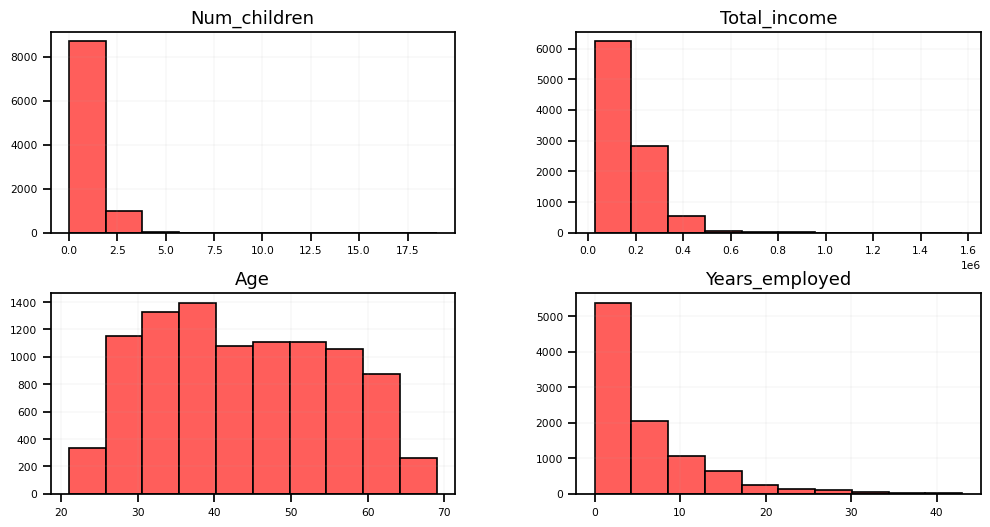

In [ ]:
plt.figure(figsize=(10,10))

cols_to_plot = ["Num_children","Total_income","Age","Years_employed"]
new_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

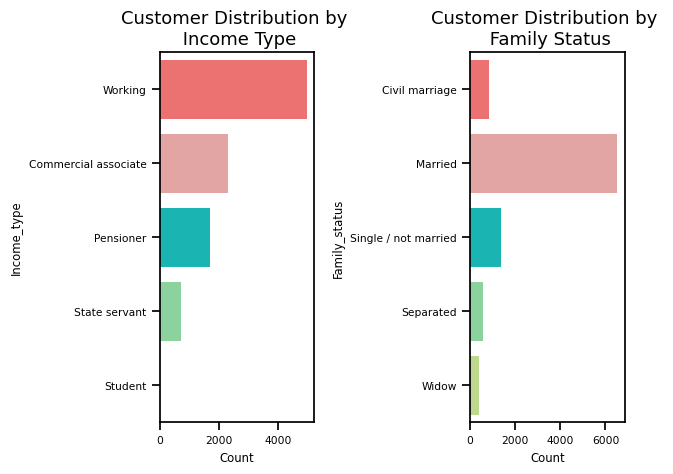

In [ ]:
ig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Income_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by \n Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Family_status,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by \n Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

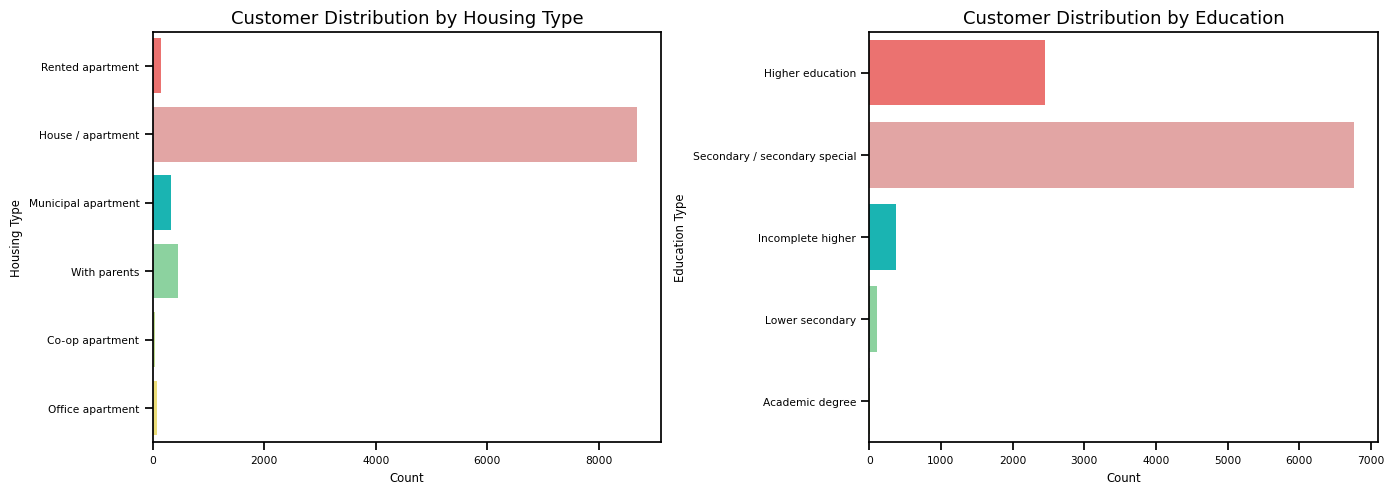

In [ ]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=new_df.Housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=new_df.Education_type, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

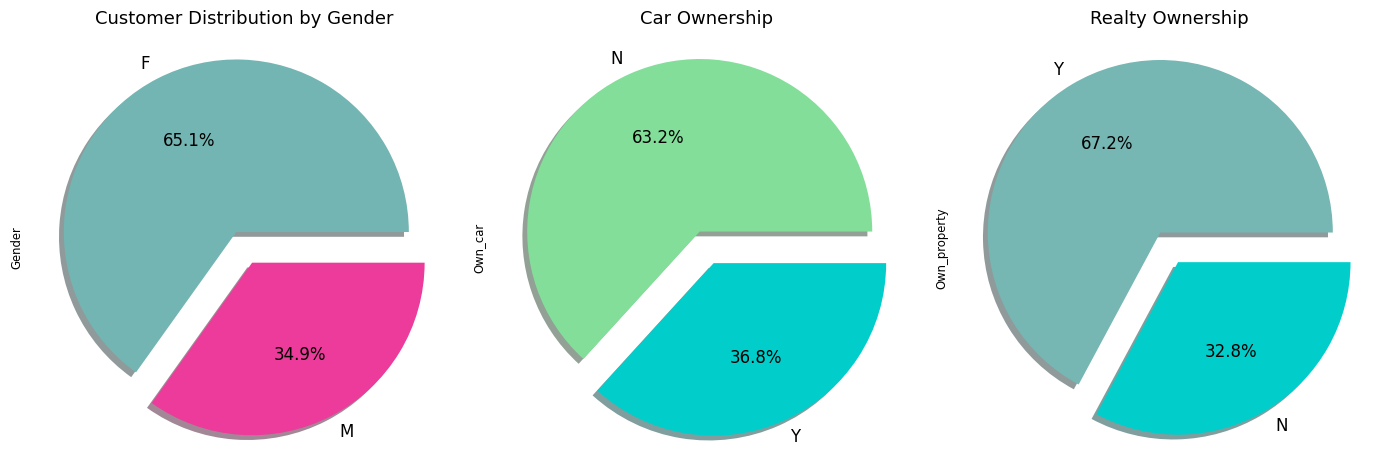

In [ ]:
fig, axes = plt.subplots(1,3)

g1= new_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= new_df['Own_car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= new_df['Own_property'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [ ]:
object_columns = new_df.columns[new_df.dtypes =='object'].tolist() 
#object columns in dataset

unique_counts = pd.DataFrame.from_records([(col, new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

unique_counts 
#unique counts for object columns 

Column_Name  Num_Unique
0           Gender           2
1          Own_car           2
2     Own_property           2
3      Income_type           5
4   Education_type           5
5    Family_status           5
6     Housing_type           6
7  Occupation_type          19

In [ ]:
# Checking unique values from Categorical Columns

for i in new_df.columns[(new_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(new_df[i].value_counts())
    print('-----------------------------------------------')

Gender 

F    6323
M    3386
Name: Gender, dtype: int64
-----------------------------------------------
Own_car 

N    6139
Y    3570
Name: Own_car, dtype: int64
-----------------------------------------------
Own_property 

Y    6520
N    3189
Name: Own_property, dtype: int64
-----------------------------------------------
Income_type 

Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: Income_type, dtype: int64
-----------------------------------------------
Education_type 

Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Education_type, dtype: int64
-----------------------------------------------
Family_status 

Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow        

In [ ]:
# Encode binary features
new_df["Gender"] =  new_df["Gender"].replace(['F','M'],[0,1])
new_df["Own_car"] = new_df["Own_car"].replace(["Y","N"],[1,0])
new_df["Own_property"] = new_df["Own_property"].replace(["Y","N"],[1,0])

In [ ]:
new_df

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0     5008804       1        1             1             0      427500.0   
1     5008806       1        1             1             0      112500.0   
2     5008808       0        0             1             0      270000.0   
3     5008812       0        0             1             0      283500.0   
4     5008815       1        1             1             0      270000.0   
...       ...     ...      ...           ...           ...           ...   
9704  5148694       0        0             0             0      180000.0   
9705  5149055       0        0             1             0      112500.0   
9706  5149729       1        1             1             0       90000.0   
9707  5149838       0        0             1             0      157500.0   
9708  5150337       1        0             1             0      112500.0   

               Income_type                 Education_type  \
0                  Working               Higher education   
1                  Working  Secondary / secondary special   
2     Commercial associate  Secondary / secondary special   
3                Pensioner               Higher education   
4                  Working               Higher education   
...                    ...                            ...   
9704             Pensioner  Secondary / secondary special   
9705  Commercial associate  Secondary / secondary special   
9706               Working  Secondary / secondary special   
9707             Pensioner               Higher education   
9708               Working  Secondary / secondary special   

             Family_status         Housing_type  Work_phone  Phone  Email  \
0           Civil marriage     Rented apartment           1      0      0   
1                  Married    House / apartment           0      0      0   
2     Single / not married    House / apartment           0      1      1   
3                Separated    House / apartment           0      0      0   
4                  Married    House / apartment           1      1      1   
...                    ...                  ...         ...    ...    ...   
9704        Civil marriage  Municipal apartment           0      0      0   
9705               Married    House / apartment           1      1      0   
9706               Married    House / apartment           0      0      0   
9707               Married    House / apartment           0      1      1   
9708  Single / not married     Rented apartment           0      0      0   

     Occupation_type  Num_family  Target  Account_length   Age  Unemployed  \
0              Other         2.0       1              15  33.0           0   
1     Security staff         2.0       0              29  59.0           0   
2        Sales staff         1.0       0               4  52.0           0   
3              Other         1.0       0              20  62.0           1   
4        Accountants         2.0       0               5  46.0           0   
...              ...         ...     ...             ...   ...         ...   
9704        Laborers         2.0       1              20  56.0           0   
9705           Other         2.0       1              19  43.0           0   
9706           Other         2.0       1              21  52.0           0   
9707  Medicine staff         2.0       1              32  34.0           0   
9708        Laborers         1.0       1              13  25.0           0   

      Years_employed  
0               12.0  
1                3.0  
2                8.0  
3                0.0  
4                2.0  
...              ...  
9704             1.0  
9705             7.0  
9706             5.0  
9707             4.0  
9708             3.0  

[9709 rows x 20 columns]

In [ ]:
new_df["Is_Working"] = new_df["Income_type"].replace(["Working","Commercial associate","State servant","Pensioner","Student"],[1,1,1,0,0])

new_df["Marital_status"] = new_df["Family_status"].replace(["Civil marriage","Married","Single / not married",
                                                                          "Separated","Widow"],[1,1,0,0,0])

In [ ]:
new_df.head()

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0  5008804       1        1             1             0      427500.0   
1  5008806       1        1             1             0      112500.0   
2  5008808       0        0             1             0      270000.0   
3  5008812       0        0             1             0      283500.0   
4  5008815       1        1             1             0      270000.0   

            Income_type                 Education_type         Family_status  \
0               Working               Higher education        Civil marriage   
1               Working  Secondary / secondary special               Married   
2  Commercial associate  Secondary / secondary special  Single / not married   
3             Pensioner               Higher education             Separated   
4               Working               Higher education               Married   

        Housing_type  ...  Email  Occupation_type  Num_family Target  \
0   Rented apartment  ...      0            Other         2.0      1   
1  House / apartment  ...      0   Security staff         2.0      0   
2  House / apartment  ...      1      Sales staff         1.0      0   
3  House / apartment  ...      0            Other         1.0      0   
4  House / apartment  ...      1      Accountants         2.0      0   

   Account_length   Age  Unemployed  Years_employed  Is_Working  \
0              15  33.0           0            12.0           1   
1              29  59.0           0             3.0           1   
2               4  52.0           0             8.0           1   
3              20  62.0           1             0.0           0   
4               5  46.0           0             2.0           1   

   Marital_status  
0               1  
1               1  
2               0  
3               0  
4               1  

[5 rows x 22 columns]

In [ ]:
housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}

In [ ]:
new_df["Housing_type"] = new_df['Housing_type'].map(housing_type)

In [ ]:
new_df

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0     5008804       1        1             1             0      427500.0   
1     5008806       1        1             1             0      112500.0   
2     5008808       0        0             1             0      270000.0   
3     5008812       0        0             1             0      283500.0   
4     5008815       1        1             1             0      270000.0   
...       ...     ...      ...           ...           ...           ...   
9704  5148694       0        0             0             0      180000.0   
9705  5149055       0        0             1             0      112500.0   
9706  5149729       1        1             1             0       90000.0   
9707  5149838       0        0             1             0      157500.0   
9708  5150337       1        0             1             0      112500.0   

               Income_type                 Education_type  \
0                  Working               Higher education   
1                  Working  Secondary / secondary special   
2     Commercial associate  Secondary / secondary special   
3                Pensioner               Higher education   
4                  Working               Higher education   
...                    ...                            ...   
9704             Pensioner  Secondary / secondary special   
9705  Commercial associate  Secondary / secondary special   
9706               Working  Secondary / secondary special   
9707             Pensioner               Higher education   
9708               Working  Secondary / secondary special   

             Family_status       Housing_type  ...  Email  Occupation_type  \
0           Civil marriage  House / apartment  ...      0            Other   
1                  Married  House / apartment  ...      0   Security staff   
2     Single / not married  House / apartment  ...      1      Sales staff   
3                Separated  House / apartment  ...      0            Other   
4                  Married  House / apartment  ...      1      Accountants   
...                    ...                ...  ...    ...              ...   
9704        Civil marriage  House / apartment  ...      0         Laborers   
9705               Married  House / apartment  ...      0            Other   
9706               Married  House / apartment  ...      0            Other   
9707               Married  House / apartment  ...      1   Medicine staff   
9708  Single / not married  House / apartment  ...      0         Laborers   

      Num_family Target  Account_length   Age  Unemployed  Years_employed  \
0            2.0      1              15  33.0           0            12.0   
1            2.0      0              29  59.0           0             3.0   
2            1.0      0               4  52.0           0             8.0   
3            1.0      0              20  62.0           1             0.0   
4            2.0      0               5  46.0           0             2.0   
...          ...    ...             ...   ...         ...             ...   
9704         2.0      1              20  56.0           0             1.0   
9705         2.0      1              19  43.0           0             7.0   
9706         2.0      1              21  52.0           0             5.0   
9707         2.0      1              32  34.0           0             4.0   
9708         1.0      1              13  25.0           0             3.0   

      Is_Working  Marital_status  
0              1               1  
1              1               1  
2              1               0  
3              0               0  
4              1               1  
...          ...             ...  
9704           0               1  
9705           1               1  
9706           1               1  
9707           0               1  
9708           1               0  

[9709 rows x 22 columns]

In [ ]:
family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}

new_df["Family_status"] = new_df["Family_status"].map(family_status)

In [ ]:
new_df

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0     5008804       1        1             1             0      427500.0   
1     5008806       1        1             1             0      112500.0   
2     5008808       0        0             1             0      270000.0   
3     5008812       0        0             1             0      283500.0   
4     5008815       1        1             1             0      270000.0   
...       ...     ...      ...           ...           ...           ...   
9704  5148694       0        0             0             0      180000.0   
9705  5149055       0        0             1             0      112500.0   
9706  5149729       1        1             1             0       90000.0   
9707  5149838       0        0             1             0      157500.0   
9708  5150337       1        0             1             0      112500.0   

               Income_type                 Education_type Family_status  \
0                  Working               Higher education       Married   
1                  Working  Secondary / secondary special       Married   
2     Commercial associate  Secondary / secondary special        Single   
3                Pensioner               Higher education        Single   
4                  Working               Higher education       Married   
...                    ...                            ...           ...   
9704             Pensioner  Secondary / secondary special       Married   
9705  Commercial associate  Secondary / secondary special       Married   
9706               Working  Secondary / secondary special       Married   
9707             Pensioner               Higher education       Married   
9708               Working  Secondary / secondary special        Single   

           Housing_type  ...  Email  Occupation_type  Num_family Target  \
0     House / apartment  ...      0            Other         2.0      1   
1     House / apartment  ...      0   Security staff         2.0      0   
2     House / apartment  ...      1      Sales staff         1.0      0   
3     House / apartment  ...      0            Other         1.0      0   
4     House / apartment  ...      1      Accountants         2.0      0   
...                 ...  ...    ...              ...         ...    ...   
9704  House / apartment  ...      0         Laborers         2.0      1   
9705  House / apartment  ...      0            Other         2.0      1   
9706  House / apartment  ...      0            Other         2.0      1   
9707  House / apartment  ...      1   Medicine staff         2.0      1   
9708  House / apartment  ...      0         Laborers         1.0      1   

      Account_length   Age  Unemployed  Years_employed  Is_Working  \
0                 15  33.0           0            12.0           1   
1                 29  59.0           0             3.0           1   
2                  4  52.0           0             8.0           1   
3                 20  62.0           1             0.0           0   
4                  5  46.0           0             2.0           1   
...              ...   ...         ...             ...         ...   
9704              20  56.0           0             1.0           0   
9705              19  43.0           0             7.0           1   
9706              21  52.0           0             5.0           1   
9707              32  34.0           0             4.0           0   
9708              13  25.0           0             3.0           1   

      Marital_status  
0                  1  
1                  1  
2                  0  
3                  0  
4                  1  
...              ...  
9704               1  
9705               1  
9706               1  
9707               1  
9708               0  

[9709 rows x 22 columns]

In [ ]:
education_type = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

new_df["Education_type"] = new_df["Education_type"].map(education_type)

In [ ]:
new_df

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0     5008804       1        1             1             0      427500.0   
1     5008806       1        1             1             0      112500.0   
2     5008808       0        0             1             0      270000.0   
3     5008812       0        0             1             0      283500.0   
4     5008815       1        1             1             0      270000.0   
...       ...     ...      ...           ...           ...           ...   
9704  5148694       0        0             0             0      180000.0   
9705  5149055       0        0             1             0      112500.0   
9706  5149729       1        1             1             0       90000.0   
9707  5149838       0        0             1             0      157500.0   
9708  5150337       1        0             1             0      112500.0   

               Income_type    Education_type Family_status       Housing_type  \
0                  Working  Higher education       Married  House / apartment   
1                  Working         secondary       Married  House / apartment   
2     Commercial associate         secondary        Single  House / apartment   
3                Pensioner  Higher education        Single  House / apartment   
4                  Working  Higher education       Married  House / apartment   
...                    ...               ...           ...                ...   
9704             Pensioner         secondary       Married  House / apartment   
9705  Commercial associate         secondary       Married  House / apartment   
9706               Working         secondary       Married  House / apartment   
9707             Pensioner  Higher education       Married  House / apartment   
9708               Working         secondary        Single  House / apartment   

      ...  Email  Occupation_type  Num_family Target  Account_length   Age  \
0     ...      0            Other         2.0      1              15  33.0   
1     ...      0   Security staff         2.0      0              29  59.0   
2     ...      1      Sales staff         1.0      0               4  52.0   
3     ...      0            Other         1.0      0              20  62.0   
4     ...      1      Accountants         2.0      0               5  46.0   
...   ...    ...              ...         ...    ...             ...   ...   
9704  ...      0         Laborers         2.0      1              20  56.0   
9705  ...      0            Other         2.0      1              19  43.0   
9706  ...      0            Other         2.0      1              21  52.0   
9707  ...      1   Medicine staff         2.0      1              32  34.0   
9708  ...      0         Laborers         1.0      1              13  25.0   

      Unemployed  Years_employed  Is_Working  Marital_status  
0              0            12.0           1               1  
1              0             3.0           1               1  
2              0             8.0           1               0  
3              1             0.0           0               0  
4              0             2.0           1               1  
...          ...             ...         ...             ...  
9704           0             1.0           0               1  
9705           0             7.0           1               1  
9706           0             5.0           1               1  
9707           0             4.0           0               1  
9708           0             3.0           1               0  

[9709 rows x 22 columns]

In [ ]:
income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}

new_df["Income_type"] = new_df["Income_type"].map(income_type)

In [ ]:
new_df

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0     5008804       1        1             1             0      427500.0   
1     5008806       1        1             1             0      112500.0   
2     5008808       0        0             1             0      270000.0   
3     5008812       0        0             1             0      283500.0   
4     5008815       1        1             1             0      270000.0   
...       ...     ...      ...           ...           ...           ...   
9704  5148694       0        0             0             0      180000.0   
9705  5149055       0        0             1             0      112500.0   
9706  5149729       1        1             1             0       90000.0   
9707  5149838       0        0             1             0      157500.0   
9708  5150337       1        0             1             0      112500.0   

     Income_type    Education_type Family_status       Housing_type  ...  \
0        Working  Higher education       Married  House / apartment  ...   
1        Working         secondary       Married  House / apartment  ...   
2        Working         secondary        Single  House / apartment  ...   
3      Pensioner  Higher education        Single  House / apartment  ...   
4        Working  Higher education       Married  House / apartment  ...   
...          ...               ...           ...                ...  ...   
9704   Pensioner         secondary       Married  House / apartment  ...   
9705     Working         secondary       Married  House / apartment  ...   
9706     Working         secondary       Married  House / apartment  ...   
9707   Pensioner  Higher education       Married  House / apartment  ...   
9708     Working         secondary        Single  House / apartment  ...   

      Email  Occupation_type  Num_family Target  Account_length   Age  \
0         0            Other         2.0      1              15  33.0   
1         0   Security staff         2.0      0              29  59.0   
2         1      Sales staff         1.0      0               4  52.0   
3         0            Other         1.0      0              20  62.0   
4         1      Accountants         2.0      0               5  46.0   
...     ...              ...         ...    ...             ...   ...   
9704      0         Laborers         2.0      1              20  56.0   
9705      0            Other         2.0      1              19  43.0   
9706      0            Other         2.0      1              21  52.0   
9707      1   Medicine staff         2.0      1              32  34.0   
9708      0         Laborers         1.0      1              13  25.0   

      Unemployed  Years_employed  Is_Working  Marital_status  
0              0            12.0           1               1  
1              0             3.0           1               1  
2              0             8.0           1               0  
3              1             0.0           0               0  
4              0             2.0           1               1  
...          ...             ...         ...             ...  
9704           0             1.0           0               1  
9705           0             7.0           1               1  
9706           0             5.0           1               1  
9707           0             4.0           0               1  
9708           0             3.0           1               0  

[9709 rows x 22 columns]

In [ ]:
new_df["Household_Size"] = new_df["Num_children"] + new_df["Marital_status"].apply(lambda x: 2 if x==1 else 1)

In [ ]:
new_df

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0     5008804       1        1             1             0      427500.0   
1     5008806       1        1             1             0      112500.0   
2     5008808       0        0             1             0      270000.0   
3     5008812       0        0             1             0      283500.0   
4     5008815       1        1             1             0      270000.0   
...       ...     ...      ...           ...           ...           ...   
9704  5148694       0        0             0             0      180000.0   
9705  5149055       0        0             1             0      112500.0   
9706  5149729       1        1             1             0       90000.0   
9707  5149838       0        0             1             0      157500.0   
9708  5150337       1        0             1             0      112500.0   

     Income_type    Education_type Family_status       Housing_type  ...  \
0        Working  Higher education       Married  House / apartment  ...   
1        Working         secondary       Married  House / apartment  ...   
2        Working         secondary        Single  House / apartment  ...   
3      Pensioner  Higher education        Single  House / apartment  ...   
4        Working  Higher education       Married  House / apartment  ...   
...          ...               ...           ...                ...  ...   
9704   Pensioner         secondary       Married  House / apartment  ...   
9705     Working         secondary       Married  House / apartment  ...   
9706     Working         secondary       Married  House / apartment  ...   
9707   Pensioner  Higher education       Married  House / apartment  ...   
9708     Working         secondary        Single  House / apartment  ...   

      Occupation_type  Num_family  Target Account_length   Age  Unemployed  \
0               Other         2.0       1             15  33.0           0   
1      Security staff         2.0       0             29  59.0           0   
2         Sales staff         1.0       0              4  52.0           0   
3               Other         1.0       0             20  62.0           1   
4         Accountants         2.0       0              5  46.0           0   
...               ...         ...     ...            ...   ...         ...   
9704         Laborers         2.0       1             20  56.0           0   
9705            Other         2.0       1             19  43.0           0   
9706            Other         2.0       1             21  52.0           0   
9707   Medicine staff         2.0       1             32  34.0           0   
9708         Laborers         1.0       1             13  25.0           0   

      Years_employed  Is_Working  Marital_status  Household_Size  
0               12.0           1               1               2  
1                3.0           1               1               2  
2                8.0           1               0               1  
3                0.0           0               0               1  
4                2.0           1               1               2  
...              ...         ...             ...             ...  
9704             1.0           0               1               2  
9705             7.0           1               1               2  
9706             5.0           1               1               2  
9707             4.0           0               1               2  
9708             3.0           1               0               1  

[9709 rows x 23 columns]

In [ ]:
numerical_cols = ["Total_income","Age","Years_employed","Household_Size"]

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Members Count"))

fig.add_trace(go.Box(x=new_df.Total_income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=new_df.Age, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=new_df.Years_employed, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=new_df.Household_Size, name="Family Member Count", boxmean=True),row=2, col=2)

fig.show()

In [ ]:
new_df["Years_employed"].value_counts()

0.0     1978
1.0      991
2.0      851
3.0      824
4.0      735
5.0      645
6.0      510
7.0      463
8.0      418
9.0      354
10.0     306
11.0     228
12.0     185
15.0     178
13.0     164
14.0     140
16.0      87
17.0      76
19.0      69
18.0      68
21.0      57
20.0      57
22.0      45
23.0      38
24.0      38
25.0      28
26.0      28
28.0      23
27.0      20
29.0      19
30.0      14
31.0      11
33.0      11
32.0      11
34.0       9
35.0       6
38.0       4
41.0       4
36.0       4
37.0       3
39.0       3
40.0       3
43.0       2
42.0       1
Name: Years_employed, dtype: int64

In [ ]:
new_df["Household_Size"].value_counts()

2     5173
1     1957
3     1636
4      801
5      117
6       18
7        4
15       1
20       1
9        1
Name: Household_Size, dtype: int64

In [ ]:
new_df[(new_df["Years_employed"]==43)]

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
7142  5112905       0        0             1             0      180000.0   
9328  5148702       0        0             1             0      126000.0   

     Income_type Education_type Family_status       Housing_type  ...  \
7142     Working      secondary       Married  House / apartment  ...   
9328     Working      secondary       Married  House / apartment  ...   

      Occupation_type  Num_family  Target Account_length   Age  Unemployed  \
7142   Medicine staff         2.0       0             16  63.0           0   
9328       Core staff         2.0       0             57  62.0           0   

      Years_employed  Is_Working  Marital_status  Household_Size  
7142            43.0           1               1               2  
9328            43.0           1               1               2  

[2 rows x 23 columns]

<Axes: >

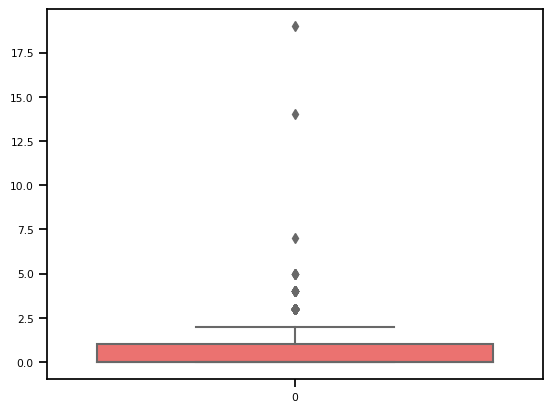

In [ ]:
sns.boxplot(new_df['Num_children'])

In [ ]:
high_bound = new_df['Num_children'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = new_df['Num_children'].quantile(0.001)
print('low_bound :', low_bound)


high_bound : 4.0
low_bound : 0.0


In [ ]:
new_df = new_df[(new_df['Num_children']>=low_bound) & (new_df['Num_children']<=high_bound)]

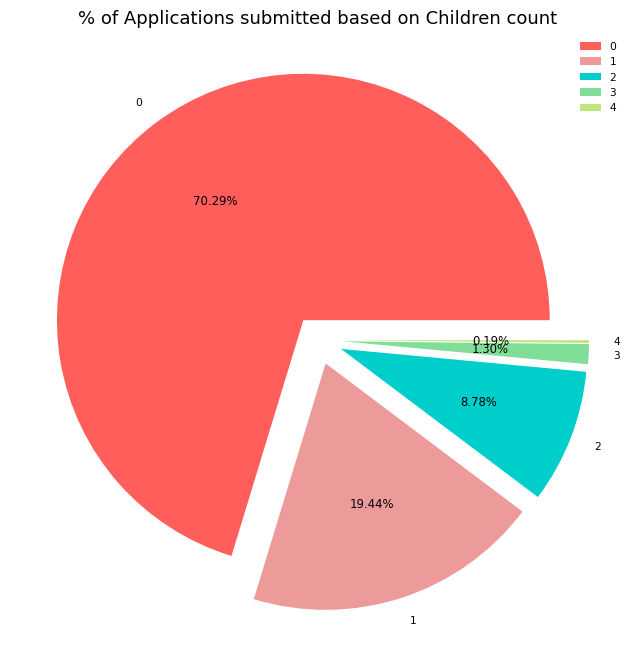

In [ ]:
# This graph shows that, majority of applicant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(new_df['Num_children'].value_counts(), labels=new_df['Num_children'].value_counts().index,explode = [0.1,0.1,0.1,0.1,0.1],autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()


In [ ]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size'],
      dtype='object')

In [ ]:
new_df = new_df.loc[:,['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family','Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size','Target']]

In [ ]:
new_df.head()

ID  Gender  Own_car  Own_property  Num_children  Total_income  \
0  5008804       1        1             1             0      427500.0   
1  5008806       1        1             1             0      112500.0   
2  5008808       0        0             1             0      270000.0   
3  5008812       0        0             1             0      283500.0   
4  5008815       1        1             1             0      270000.0   

  Income_type    Education_type Family_status       Housing_type  ...  \
0     Working  Higher education       Married  House / apartment  ...   
1     Working         secondary       Married  House / apartment  ...   
2     Working         secondary        Single  House / apartment  ...   
3   Pensioner  Higher education        Single  House / apartment  ...   
4     Working  Higher education       Married  House / apartment  ...   

   Occupation_type  Num_family  Account_length   Age  Unemployed  \
0            Other         2.0              15  33.0           0   
1   Security staff         2.0              29  59.0           0   
2      Sales staff         1.0               4  52.0           0   
3            Other         1.0              20  62.0           1   
4      Accountants         2.0               5  46.0           0   

   Years_employed  Is_Working  Marital_status  Household_Size  Target  
0            12.0           1               1               2       1  
1             3.0           1               1               2       0  
2             8.0           1               0               1       0  
3             0.0           0               0               1       0  
4             2.0           1               1               2       0  

[5 rows x 23 columns]

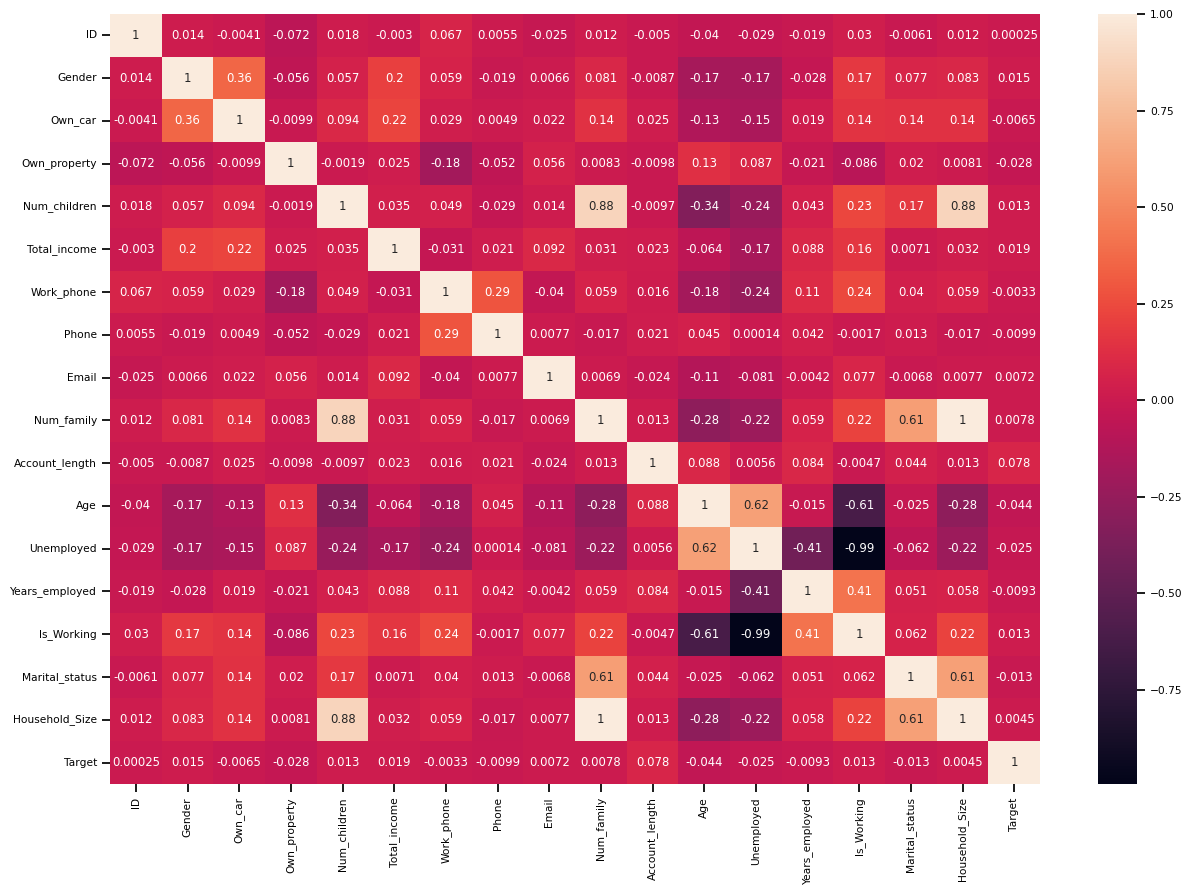

In [ ]:
plt.figure(figsize=(15, 10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show();

In [ ]:
new_df.drop('Num_family', axis=1, inplace=True)

In [ ]:
new_df.drop(["ID"],axis=1,inplace=True)

In [ ]:
new_df.drop('Num_children', axis=1, inplace=True)

In [ ]:
new_df.drop(["Email"],axis=1,inplace=True)

In [ ]:
new_df.drop('Is_Working', axis=1, inplace=True)

In [ ]:
new_df.drop(["Phone"],axis=1,inplace=True)

In [ ]:
new_df.drop(["Work_phone"],axis=1,inplace=True)

In [ ]:
new_df.drop(["Occupation_type"],axis=1,inplace=True)

In [ ]:
new_df.drop(["Family_status"],axis=1,inplace=True)

In [ ]:
new_df.drop(["Account_length"],axis=1,inplace=True)

In [ ]:
new_df.shape

(9701, 13)

In [ ]:
new_df

Gender  Own_car  Own_property  Total_income Income_type  \
0          1        1             1      427500.0     Working   
1          1        1             1      112500.0     Working   
2          0        0             1      270000.0     Working   
3          0        0             1      283500.0   Pensioner   
4          1        1             1      270000.0     Working   
...      ...      ...           ...           ...         ...   
9704       0        0             0      180000.0   Pensioner   
9705       0        0             1      112500.0     Working   
9706       1        1             1       90000.0     Working   
9707       0        0             1      157500.0   Pensioner   
9708       1        0             1      112500.0     Working   

        Education_type       Housing_type   Age  Unemployed  Years_employed  \
0     Higher education  House / apartment  33.0           0            12.0   
1            secondary  House / apartment  59.0           0             3.0   
2            secondary  House / apartment  52.0           0             8.0   
3     Higher education  House / apartment  62.0           1             0.0   
4     Higher education  House / apartment  46.0           0             2.0   
...                ...                ...   ...         ...             ...   
9704         secondary  House / apartment  56.0           0             1.0   
9705         secondary  House / apartment  43.0           0             7.0   
9706         secondary  House / apartment  52.0           0             5.0   
9707  Higher education  House / apartment  34.0           0             4.0   
9708         secondary  House / apartment  25.0           0             3.0   

      Marital_status  Household_Size  Target  
0                  1               2       1  
1                  1               2       0  
2                  0               1       0  
3                  0               1       0  
4                  1               2       0  
...              ...             ...     ...  
9704               1               2       1  
9705               1               2       1  
9706               1               2       1  
9707               1               2       1  
9708               0               1       1  

[9701 rows x 13 columns]

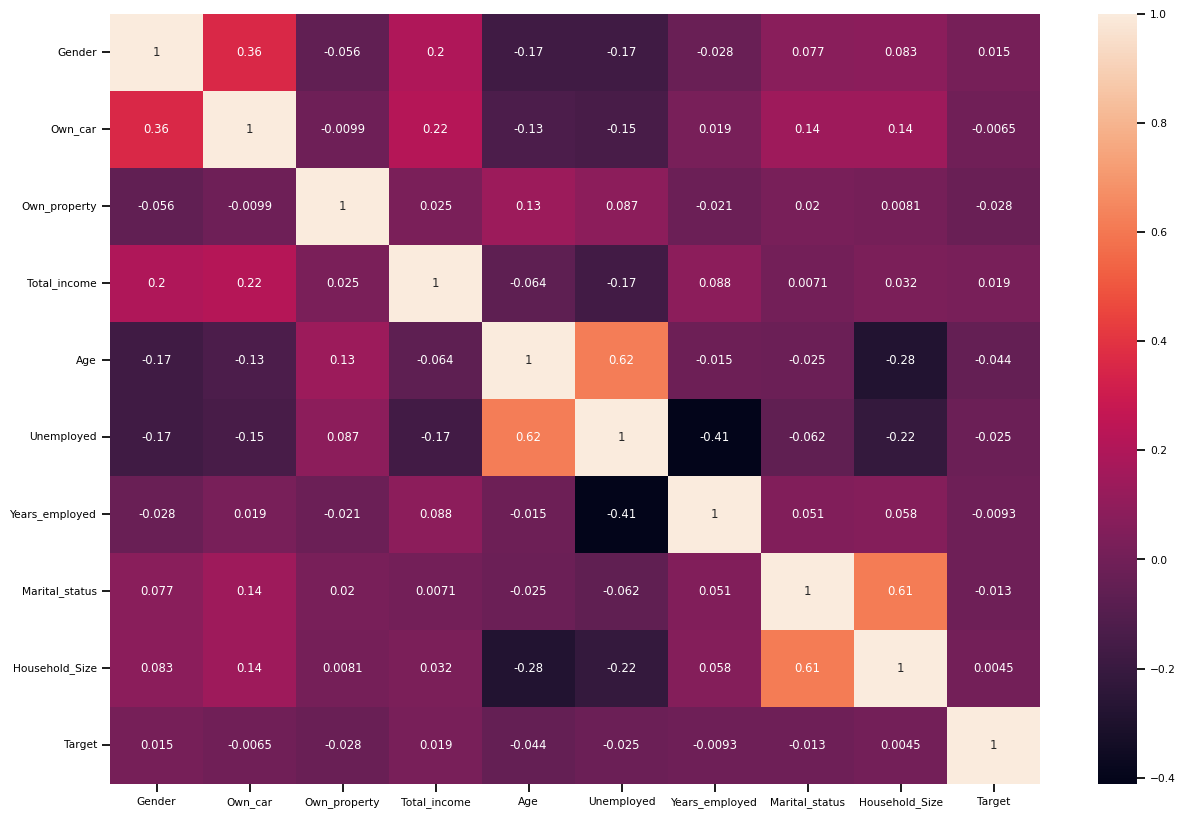

In [ ]:
plt.figure(figsize=(15, 10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show();

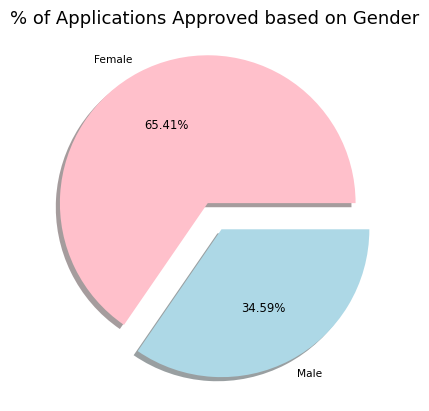

In [ ]:
plt.pie(new_df[new_df['Target']==0]['Gender'].value_counts(), explode=[0.1,0.1],shadow =True, labels=['Female', 'Male'], autopct='%1.2f%%',colors=["pink",'lightblue'])
plt.title('% of Applications Approved based on Gender')
plt.show()

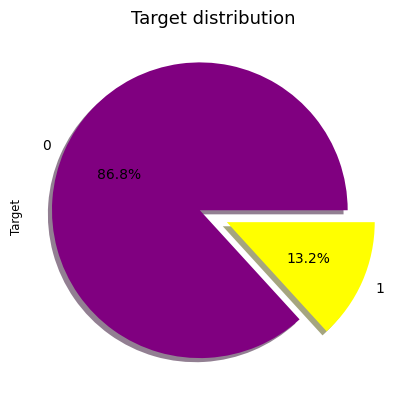

In [ ]:
new_df['Target'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=['purple', 'yellow'],textprops = {'fontsize':10}).set_title("Target distribution")

plt.show()


In [ ]:
new_df.head()

Gender  Own_car  Own_property  Total_income Income_type    Education_type  \
0       1        1             1      427500.0     Working  Higher education   
1       1        1             1      112500.0     Working         secondary   
2       0        0             1      270000.0     Working         secondary   
3       0        0             1      283500.0   Pensioner  Higher education   
4       1        1             1      270000.0     Working  Higher education   

        Housing_type   Age  Unemployed  Years_employed  Marital_status  \
0  House / apartment  33.0           0            12.0               1   
1  House / apartment  59.0           0             3.0               1   
2  House / apartment  52.0           0             8.0               0   
3  House / apartment  62.0           1             0.0               0   
4  House / apartment  46.0           0             2.0               1   

   Household_Size  Target  
0               2       1  
1               2       0  
2               1       0  
3               1       0  
4               2       0

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9701 entries, 0 to 9708
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          9701 non-null   int64  
 1   Own_car         9701 non-null   int64  
 2   Own_property    9701 non-null   int64  
 3   Total_income    9701 non-null   float64
 4   Income_type     9701 non-null   object 
 5   Education_type  9701 non-null   object 
 6   Housing_type    9701 non-null   object 
 7   Age             9701 non-null   float64
 8   Unemployed      9701 non-null   int64  
 9   Years_employed  9701 non-null   float64
 10  Marital_status  9701 non-null   int64  
 11  Household_Size  9701 non-null   int64  
 12  Target          9701 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.0+ MB


In [ ]:
colname=[]
for x in new_df.columns:
    if new_df[x].dtype=='object':
        colname.append(x)
colname

['Income_type', 'Education_type', 'Housing_type']

In [ ]:
#To check if there are any special characters in place of values 
for i in new_df.columns:
    print({i:new_df[i].unique()})

{'Gender': array([1, 0])}
{'Own_car': array([1, 0])}
{'Own_property': array([1, 0])}
{'Total_income': array([ 427500. ,  112500. ,  270000. ,  283500. ,  135000. ,  130500. ,
        157500. ,  405000. ,  211500. ,  360000. ,  126000. ,  315000. ,
        247500. ,  297000. ,  225000. ,  166500. ,  216000. ,  255150. ,
        148500. ,  202500. ,   94500. ,  450000. ,  180000. ,   90000. ,
        765000. ,  382500. ,  144000. ,  229500. ,  292500. ,   74250. ,
         40500. ,  337500. ,  193500. ,  267750. ,  139500. ,   67500. ,
        252000. ,  900000. ,  115290. ,  279000. ,   76500. ,  234000. ,
         81000. ,  108000. ,   99000. ,  198000. ,   45000. ,  238500. ,
        117000. ,  153000. , 1350000. ,  445500. ,  495000. ,   85500. ,
        306000. ,  562500. ,  189000. ,  328500. ,  310500. ,  540000. ,
        171000. ,  675000. ,  121500. ,   72000. ,   65250. ,  184500. ,
        103500. ,  162000. ,  165150. ,   54000. ,  243000. ,  256500. ,
         33300. ,  697

#### **Converting all Non-Numerical Columns to Numerical**


In [ ]:
#Converting the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()

for x in colname:
    new_df[x]=le.fit_transform(new_df[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Income_type
mapping {'Pensioner': 0, 'Student': 1, 'Working': 2}
Feature Education_type
mapping {'Academic degree': 0, 'Higher education': 1, 'secondary': 2}
Feature Housing_type
mapping {'House / apartment': 0, 'With parents': 1}


### **Creating X & Y variables for predictions**

In [ ]:
#Create X & Y 
X = new_df.iloc[:,0:-1]
Y = new_df.iloc[:,-1]

In [ ]:
print(X.shape)
print(Y.shape)

(9701, 12)
(9701,)


### **Scaling the X variables**
As there are different feature variables in X, it can have a possibility of giving more importance to the variables having greater range and give less important to variables having small range which is not suitable.  

So to overcome this problem scaling is done on the all variables in X, as it will bring all the variables in a same range

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
     

In [ ]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
     


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7760, 12)
(7760,)
(1941, 12)
(1941,)


#### Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

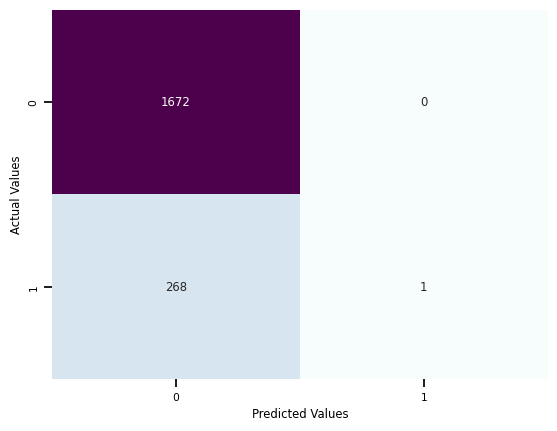

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       1.00      0.00      0.01       269

    accuracy                           0.86      1941
   macro avg       0.93      0.50      0.47      1941
weighted avg       0.88      0.86      0.80      1941

Accuracy of the model:  0.8619268418341062


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### KNN

In [ ]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

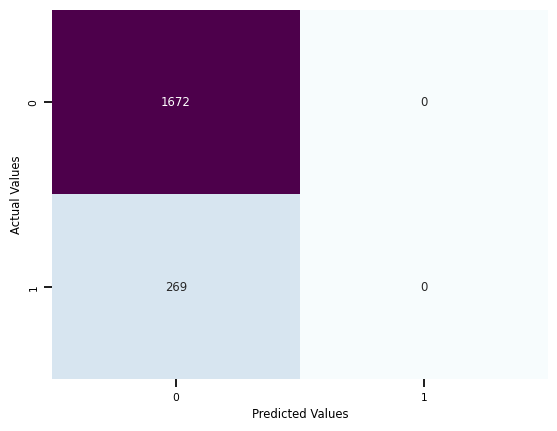

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1941
   macro avg       0.43      0.50      0.46      1941
weighted avg       0.74      0.86      0.80      1941

Accuracy of the model:  0.8614116434827409


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train,Y_train)
#predicting the test set results
Y_pred = classifier.predict(X_test)

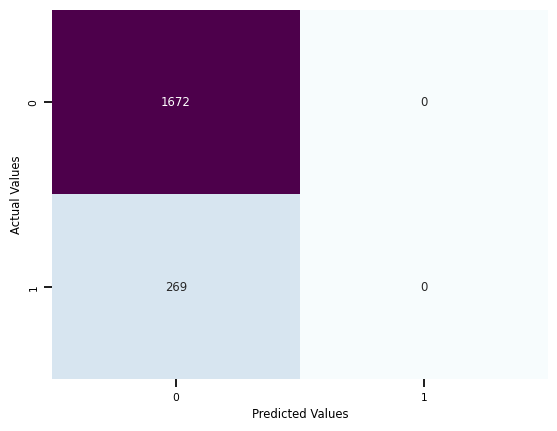

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1941
   macro avg       0.43      0.50      0.46      1941
weighted avg       0.74      0.86      0.80      1941

Accuracy of the model:  0.8614116434827409


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=10)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

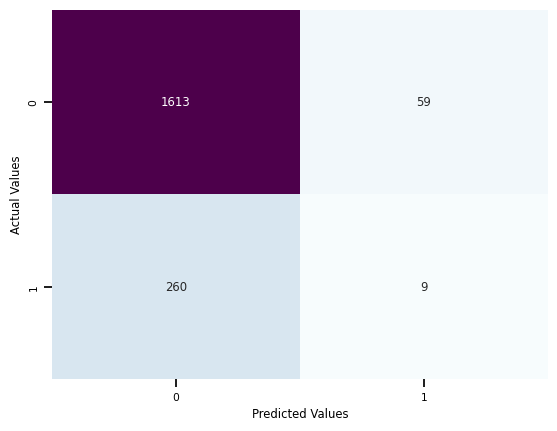

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1672
           1       0.13      0.03      0.05       269

    accuracy                           0.84      1941
   macro avg       0.50      0.50      0.48      1941
weighted avg       0.76      0.84      0.79      1941

Accuracy of the model:  0.8356517259144771


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
y=new_df["Target"]
x=new_df.drop(["Target"],axis=1)

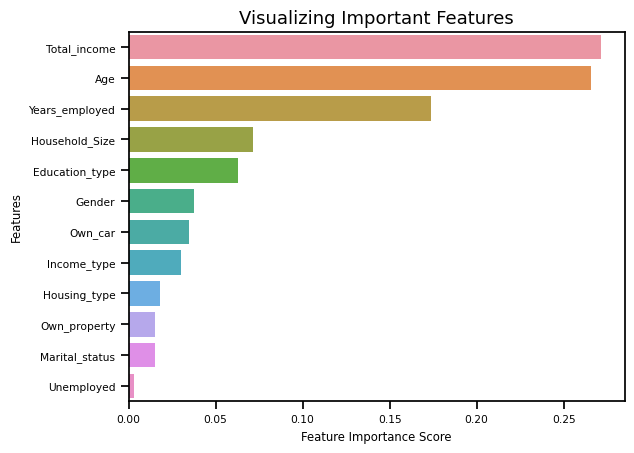

In [ ]:
feature_imp = pd.Series(model_DecisionTree.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=50,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

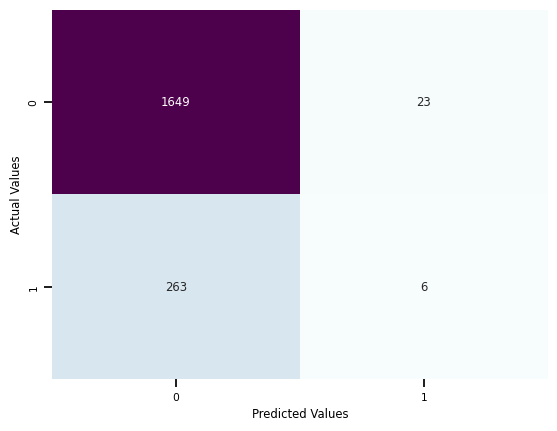

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1672
           1       0.21      0.02      0.04       269

    accuracy                           0.85      1941
   macro avg       0.53      0.50      0.48      1941
weighted avg       0.77      0.85      0.80      1941

Accuracy of the model:  0.8526532715095312


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

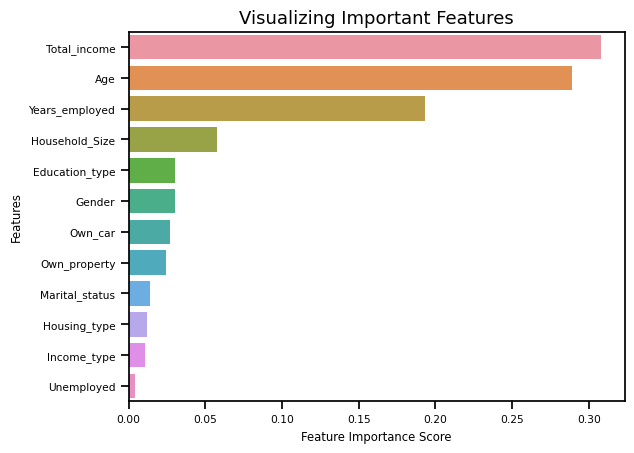

In [ ]:
feature_imp = pd.Series(model_RandomForest.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
new_df.drop(["Household_Size"],axis=1,inplace=True)

In [ ]:
new_df.drop(["Own_car"],axis=1,inplace=True)

In [ ]:
new_df.drop(["Own_property"],axis=1,inplace=True)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train,Y_train)

Y_pred = model_ExtraTrees.predict(X_test)

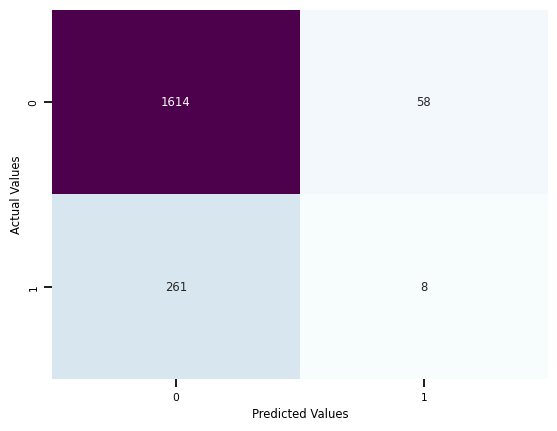

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1672
           1       0.12      0.03      0.05       269

    accuracy                           0.84      1941
   macro avg       0.49      0.50      0.48      1941
weighted avg       0.76      0.84      0.79      1941

Accuracy of the model:  0.8356517259144771


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)
     

In [ ]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)

Y_pred=model_AdaBoost.predict(X_test)

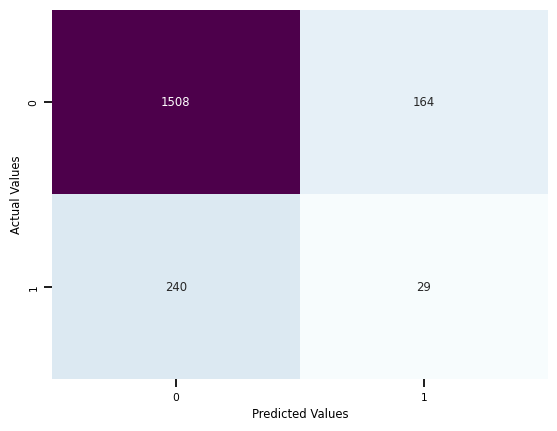

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1672
           1       0.15      0.11      0.13       269

    accuracy                           0.79      1941
   macro avg       0.51      0.50      0.50      1941
weighted avg       0.76      0.79      0.78      1941

Accuracy of the model:  0.7918598660484286


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,Y_train)

Y_pred=model_XGBoost.predict(X_test)

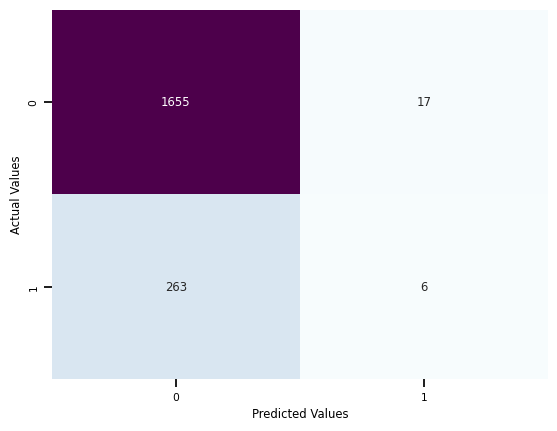

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1672
           1       0.26      0.02      0.04       269

    accuracy                           0.86      1941
   macro avg       0.56      0.51      0.48      1941
weighted avg       0.78      0.86      0.80      1941

Accuracy of the model:  0.8557444616177228


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### **SMOTE**

In [ ]:
import imblearn

In [ ]:
X=new_df.values[:,:-1]      
Y=new_df.values[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
     

In [ ]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  893
Before OverSampling, counts of label '0':  5897
After OverSampling, the shape of train_X:  (11794, 9)
After OverSampling, the shape of train_y:  (11794,)
After OverSampling, counts of label '1':  5897
After OverSampling, counts of label '0':  5897


In [ ]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train_res,Y_train_res)

Y_pred=model_RandomForest.predict(X_test)

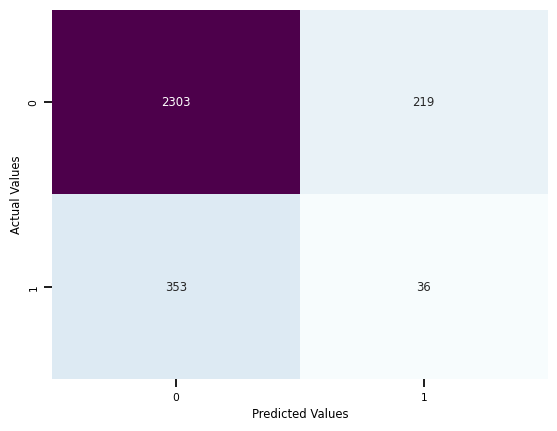

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      2522
         1.0       0.14      0.09      0.11       389

    accuracy                           0.80      2911
   macro avg       0.50      0.50      0.50      2911
weighted avg       0.77      0.80      0.79      2911

Accuracy of the model:  0.803503950532463


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)
     

In [ ]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train_res,Y_train_res)

Y_pred = model_ExtraTrees.predict(X_test)

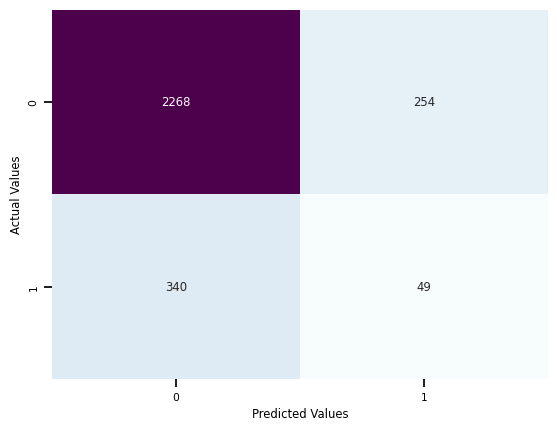

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      2522
         1.0       0.16      0.13      0.14       389

    accuracy                           0.80      2911
   macro avg       0.52      0.51      0.51      2911
weighted avg       0.78      0.80      0.78      2911

Accuracy of the model:  0.795946410168327


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train_res,Y_train_res)

Y_pred=model_AdaBoost.predict(X_test)

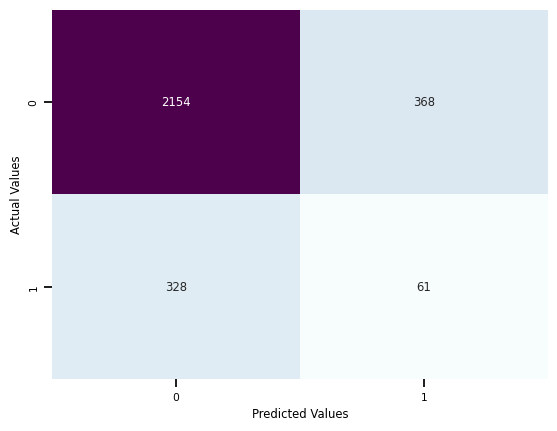

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      2522
         1.0       0.14      0.16      0.15       389

    accuracy                           0.76      2911
   macro avg       0.51      0.51      0.51      2911
weighted avg       0.77      0.76      0.77      2911

Accuracy of the model:  0.7609069048436963


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=500,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train_res,Y_train_res)

Y_pred=model_XGBoost.predict(X_test)

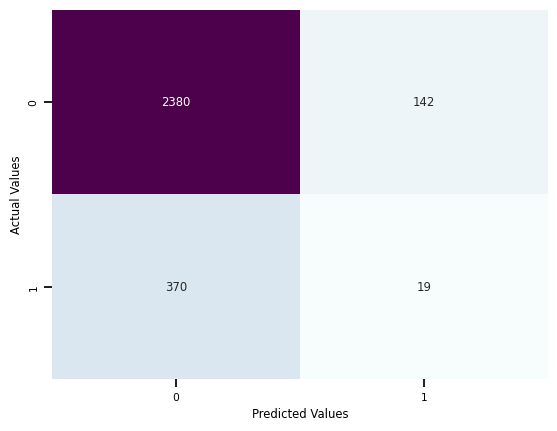

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      2522
         1.0       0.12      0.05      0.07       389

    accuracy                           0.82      2911
   macro avg       0.49      0.50      0.49      2911
weighted avg       0.77      0.82      0.79      2911

Accuracy of the model:  0.8241154242528341


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train_res,Y_train_res)

Y_pred=classifier.predict(X_test)

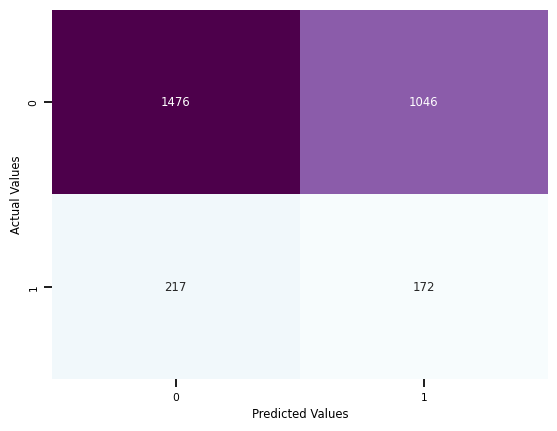

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70      2522
         1.0       0.14      0.44      0.21       389

    accuracy                           0.57      2911
   macro avg       0.51      0.51      0.46      2911
weighted avg       0.77      0.57      0.64      2911

Accuracy of the model:  0.5661284781861903


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train_res,Y_train_res)
#predicting the test set results
Y_pred = classifier.predict(X_test)

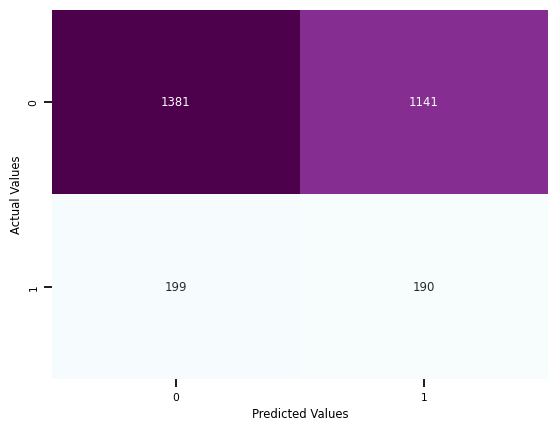

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.55      0.67      2522
         1.0       0.14      0.49      0.22       389

    accuracy                           0.54      2911
   macro avg       0.51      0.52      0.45      2911
weighted avg       0.78      0.54      0.61      2911

Accuracy of the model:  0.5396770869117142


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=7,
                              metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train_res,Y_train_res)

Y_pred=model_KNN.predict(X_test)

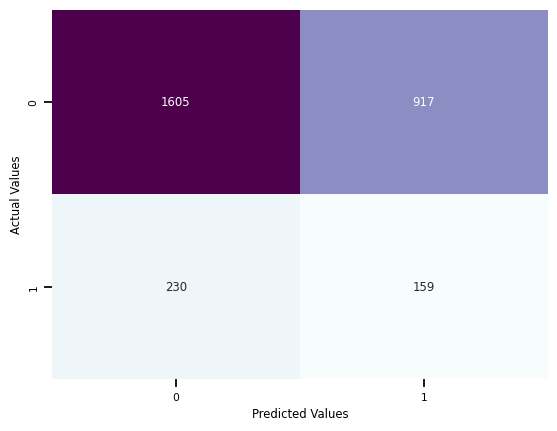

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.64      0.74      2522
         1.0       0.15      0.41      0.22       389

    accuracy                           0.61      2911
   macro avg       0.51      0.52      0.48      2911
weighted avg       0.78      0.61      0.67      2911

Accuracy of the model:  0.6059773273789076


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

From the above models different models built-up on the data we can observe that Logistic Regression & KNN was working better in terms of recall even if the accuracy was not so good.  

From Logistic & KNN model, we will choose the KNN model as its recall was good enough as compared to other models. Type1 & Type2 errors were also seemed to be comparatively good with respect to other models.
